In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# Importing the dataset
dataset = pd.read_csv('Kerela_Dataset.csv')
dataset.head()

,Latitude,Longitude,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,Crop,Yield,Unnamed: 17,Unnamed: 18
0,11.96362,75.44565,5.0,0.03,1.9,25.0,164.0,191.0,78.4,18.4,2.22,0.35,39.7,0.89,46.3,Coconut,7254.0,NaN,NaN
1,11.96383,75.45534,4.7,0.08,1.2,23.0,464.0,433.5,125.4,8.8,1.83,0.33,25.1,0.61,42.3,Coconut,6485.0,NaN,NaN
2,11.96383,75.45534,4.7,0.08,1.2,23.0,464.0,433.5,125.4,8.8,1.83,0.33,25.1,0.61,42.3,Pepper,412.0,NaN,NaN
3,11.96383,75.45534,4.7,0.08,1.2,23.0,464.0,433.5,125.4,8.8,1.83,0.33,25.1,0.61,42.3,Banana,7900.0,NaN,NaN
4,11.96198,75.45338,4.4,0.16,2.0,43.0,55.0,268.5,116.3,7.9,3.54,0.37,187.5,5.23,30.0,Paddy,2345.0,NaN,NaN


In [3]:
# Columns present in the dataset
print(dataset.columns)

Index(['Latitude', 'Longitude', 'pH', 'EC', 'OC', 'P', 'K', 'Ca', 'Mg', 'S',
       'Zn', 'B', 'Fe', 'Cu', 'Mn', 'Crop', 'Yield', 'Unnamed: 17',
       'Unnamed: 18'],
      dtype='object')


In [4]:
# Dropping Latitude, Longitude and 2 other irrelevant columns
dataset = dataset.drop(['Unnamed: 17', 'Unnamed: 18', 'Latitude', 'Longitude'], axis = 1)
dataset = dataset.dropna()
dataset

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,Crop,Yield
0,5.0,0.03,1.9,25.0,164.0,191.0,78.4,18.4,2.22,0.35,39.7,0.89,46.3,Coconut,7254.0
1,4.7,0.08,1.2,23.0,464.0,433.5,125.4,8.8,1.83,0.33,25.1,0.61,42.3,Coconut,6485.0
2,4.7,0.08,1.2,23.0,464.0,433.5,125.4,8.8,1.83,0.33,25.1,0.61,42.3,Pepper,412.0
3,4.7,0.08,1.2,23.0,464.0,433.5,125.4,8.8,1.83,0.33,25.1,0.61,42.3,Banana,7900.0
4,4.4,0.16,2.0,43.0,55.0,268.5,116.3,7.9,3.54,0.37,187.5,5.23,30.0,Paddy,2345.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,5.3,0.09,1.7,61.0,216.0,187.0,80.8,11.8,2.59,0.46,75.3,3.42,38.7,Paddy,2100.0
145,5.2,0.05,1.4,53.0,100.0,86.0,57.1,12.3,2.73,0.33,77.8,3.87,27.7,Paddy,2200.0
146,5.1,0.10,1.6,50.0,109.0,213.5,76.8,14.4,5.32,0.36,301.6,7.28,14.8,Paddy,2450.0
147,5.6,0.07,1.5,41.0,323.0,332.5,77.5,15.1,1.54,0.36,7.4,1.26,53.8,Coconut,7800.0


In [5]:
# Printing the unique crop labels and their corresponding counts
crop_dict = dict()
for i in dataset.Crop:
    if i not in crop_dict.keys():
        crop_dict[i] = 1
    else:
        crop_dict[i] = crop_dict[i] + 1
        
print('Crop Labels and their Count')
for i in crop_dict.keys():
    print(i,"--------->", crop_dict[i])

    

Crop Labels and their Count
Coconut ---------> 6
Pepper ---------> 1
Banana ---------> 3
Paddy ---------> 103
Bittergouard ---------> 1
Bittergourd ---------> 1
Cucurbit ---------> 1
Bhendi ---------> 3
Cowpea ---------> 7
Brinjal ---------> 7
Tapioca ---------> 3
Tomato ---------> 1
Arecanut ---------> 3
cowpea ---------> 2
paddy ---------> 1
Rubber ---------> 6


In [6]:
# Only retaining rows with the crop label as "Paddy"
dataset['Crop'] = dataset['Crop'].replace(['paddy'],'Paddy')
dataset['Crop'] = dataset['Crop'].replace(['Bittergouard'],'Bittergourd')
dataset = dataset[dataset.Crop == 'Paddy']
dataset = dataset.drop(["Crop"], axis = 1)

<AxesSubplot:>

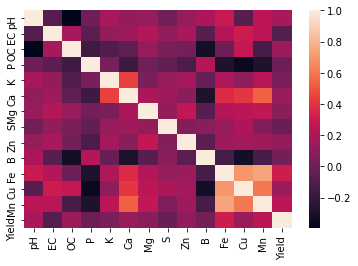

In [7]:
#Heatmap
dataset = pd.get_dummies(dataset)
corr = dataset.corr()
# plt.subplots(figsize(20,15))
sns.heatmap(corr)